# Single Linear Regression

__Objective__: Recreate the results of `numpy.linalg.lstsq()` from scratch, using linear algebra. :D

## PART 1: `numpy.linalg.lstsq()`

This is an exact copy of the code sample you saw in Part 1 of the previous prep.

__To do__: 
1. Run the cell below to see `numpy.linalg.lstsq()` in action.
2. Look to see how `lstsq`'s output (`W`) is used to predict a Y-value (`Y_pred`) for each X value in the dataset. This will help you complete Part 2, below.

Data generated with the equation:
Y = 3*X + 10 + noise

W_np:
[[3.441]
 [9.435]]


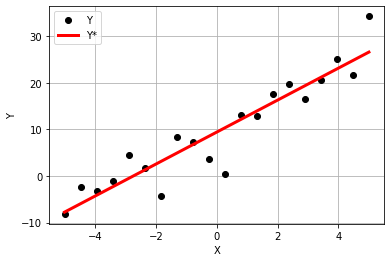

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
np.random.seed( 251 )

# A linear dataset: y = 10x + 3
n = 20
slope =  3
offset = 10
noise = np.random.normal( 0, 4, (n,1))
X = np.linspace( -5, 5, n ).reshape((n,1))
Y = slope*X + offset + noise
print("Data generated with the equation:")
print("Y = {0}*X + {1} + noise".format(slope, offset))

# Tack a homogeneous coordinate (H) onto the independent variable (X)
H = np.ones((X.shape))
A = np.hstack((X,H))

# Linear Regression: Find the weights W that define the best fit
W_np = np.linalg.lstsq(A, Y, rcond=None)[0]
print("\nW_np:")
print( W_np )

# Predict the output based on best W
Y_pred = A @ W_np

# Visualization
plt.plot( X[:,0], Y[:,0], "ok", label="Y" )
plt.plot( X[:,0], Y_pred[:,0], '-r', linewidth=3, label="Y*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

## PART 2: Recreate the results above using linear algebra. 

__To do__: 
1. Solve for the weights (`W_from_scratch`) that minimize the regression line's residual sum of squares (RSS) error.
2. Use your new weights (`W_from_scratch`) to predict a Y-value for each value in the matrix X (or A, which includes both X and a column of normal homogeneous coordinates). 
3. Sanity check: Plot __your__ predicted Y-values as blue diamonds alongside `numpy.linalg.lstsq()`'s predicted Y values (the red line, above).

*Hints:*

* *The vectorized version of the equation is near the end of Wednesday's slides.*

* *To invert an ndarray M in Numpy, you can use the function `np.linalg.inv( M )`.*

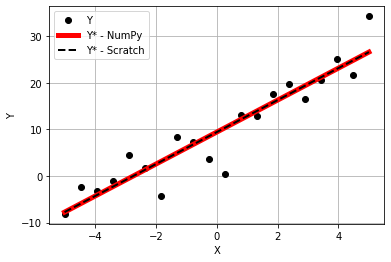

In [13]:
# Solve for W_scratch using the equation from 03.2 Linear Regression, slide 20:
# W = (X^T * X)^-1 * X^T * Y
W_scratch = np.linalg.pinv( A.T @ A ) @ A.T @ Y


# Predict new Y values, Y_scratch
# Y = (W * X^T)^T
Y_scratch = A @ W_scratch


# Visualize new predictions Y_scratch alongside lstsq()'s results, Y_pred
plt.plot( X[:,0], Y[:,0], "ok", label="Y" )
plt.plot( X[:,0], Y_pred[:,0], '-r', linewidth=5, label="Y* - NumPy")
plt.plot( X[:,0], Y_scratch[:,0], '--k', linewidth=2, label="Y* - Scratch")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

## PART 3: Evaluate your fit

__To do__: Calculate the RSS and coefficient of determination (R-squared) of your line of best fit, above.

In [16]:
print("\nW_scratch:")
print( W_scratch )


W_scratch:
[[3.441]
 [9.435]]
